In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn import model_selection
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
import sklearn.datasets as datasets
from sklearn.metrics import classification_report as report
from sklearn.datasets import make_classification
from numpy import argmax
from sklearn import metrics
from imblearn.over_sampling import SVMSMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data=pd.read_csv("data2.csv")

In [3]:
data.drop(data.index[(data["Valence_B"] == "5")],axis=0,inplace=True)
data.drop(data.index[(data["Valence_A"] == "5")],axis=0,inplace=True)
data.drop(data.index[(data["Valence_B"] == "4")],axis=0,inplace=True)
data.drop(data.index[(data["Valence_A"] == "4")],axis=0,inplace=True)
data.drop(data.index[(data["Valence_A"] == "element not in BV")],axis=0,inplace=True)
data.drop(data.index[(data["Valence_B"] == "element not in BV")],axis=0,inplace=True)
data.drop(data.index[(data["Vacancy_energy"] =="-")],axis=0,inplace=True)
data['Valence_A'] = data['Valence_A'].replace(['not balanced'], '0') 
data['Valence_A'] = data['Valence_A'].replace(['3'], '1') 
data['Valence_B'] = data['Valence_B'].replace(['not balanced'], '0') 
data['Valence_B'] = data['Valence_B'].replace(['3'], '1') 
data['Lowest_distortion'] = data['Lowest_distortion'].replace(['cubic'], 0) 
data['Lowest_distortion'] = data['Lowest_distortion'].replace(['orthorhombic'], 1)
data['Lowest_distortion'] = data['Lowest_distortion'].replace(['rhombohedral'], 2)
data['Lowest_distortion'] = data['Lowest_distortion'].replace(['tetragonal'], 3)
data['Magnetic_moment'] = data['Magnetic_moment'].replace(['-'], '0.00')
data['Vacancy_energy'] = data['Vacancy_energy'].replace(['-'], '0.00')
data['In_literature'] = data['In_literature'].replace([False], '0') 
data['In_literature'] = data['In_literature'].replace([True], '1')

In [4]:
data.head()

,Chemical_formula,A,B,In_literature,Valence_A,Valence_B,Radius_A,Radius_B,Lowest_distortion,Formation_energy,...,Magnetic_moment,Volume_per_atom,Band_gap,a,b,c,alpha,beta,gamma,Vacancy_energy
74,Ag2O3,Ag,Ag,0,0,0,1.28,0.95,0,0.351,...,0.00,12.997,0,4.02,4.02,4.02,90,90,90,-2.694
75,AgAlO3,Ag,Al,0,0,0,1.28,0.54,1,-1.51,...,0.00,9.898,0,5.094,5.323,7.3,90,90,90,-1.341
78,AgBO3,Ag,B,0,1,1,0.75,0.27,0,-0.35,...,0.00,8.138,0,3.439,3.439,3.439,90,90,90,-2.641
79,AgBaO3,Ag,Ba,0,0,0,1.28,1.35,1,-0.989,...,0.00,15.631,0.247,6.636,6.739,6.99,90,90,90,-6.975
80,AgBeO3,Ag,Be,0,0,0,1.28,0.45,0,-0.616,...,0.00,8.781,0,3.528,3.528,3.528,90,90,90,-3.058


In [5]:
data.columns=["Chemical_formula","A","B","In_literature","Valence_A","Valence_B","Radius_A","Radius_B","Lowest_distortion","Formation_energy","Stability","Magnetic_moment","Volume_per_atom","Band_gap","a","b","c","alpha","beta","gamma","Vacancy_energy"]

In [6]:
features=["Formation_energy","Stability","Magnetic_moment","Volume_per_atom","Band_gap","Vacancy_energy","Radius_A","Radius_B","Valence_A","Valence_B"]
X = data.loc[1:, features].values
Y = data.loc[1:, "Lowest_distortion"].values

In [7]:
from matplotlib import rcParams
from matplotlib.cm import rainbow

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split (X, Y, test_size=0.2, random_state=42)

In [9]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = svm.SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_train, y_train))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

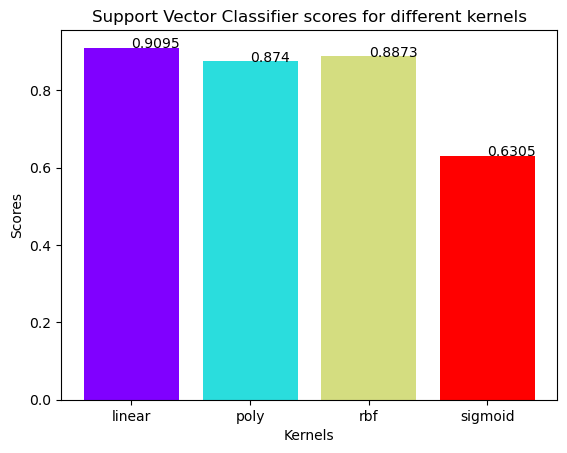

In [10]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, round(svc_scores[i],5), round(svc_scores[i],4))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [11]:
print('Support Vector Classifier scores for different kernels without weights')
for i in range (0,4):
    print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[i]*100, kernels[i]))

Support Vector Classifier scores for different kernels without weights
The score for Support Vector Classifier is 90.95215537659877% with linear kernel.
The score for Support Vector Classifier is 87.39933680720038% with poly kernel.
The score for Support Vector Classifier is 88.72572240644244% with rbf kernel.
The score for Support Vector Classifier is 63.05068687825675% with sigmoid kernel.


In [12]:
#from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':('linear','sigmoid', 'rbf'), 'C':[0.01,0.1,1,10], 'gamma':[0.01,0.1,1,10,100]}
#svr = svm.SVC()
#grid = GridSearchCV(estimator=svc_classifier, param_grid=parameters,n_jobs=-1)
#grid.fit(X_train, y_train)
#print (grid.best_params_)

In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','sigmoid', 'rbf'), 'C':[205,207.5,209.5,210,210.5,212.5,215], 'gamma':[0.01,0.1,1,10]}
#svr = svm.SVC()
grid = GridSearchCV(estimator=svc_classifier, param_grid=parameters,n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_params_)

{'C': 209.5, 'gamma': 0.01, 'kernel': 'rbf'}


In [29]:
sv=svm.SVC(kernel='rbf',gamma=0.01,C=209.5,probability=True)

In [30]:
sv.fit(X_train,y_train)

SVC(C=209.5, gamma=0.01, probability=True)

In [31]:
print(sv.fit(X_train,y_train))

SVC(C=209.5, gamma=0.01, probability=True)


In [32]:
from sklearn.metrics import log_loss
clf_probs = sv.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.22343750995134037


**XGB**

In [18]:
xgb_clf = XGBClassifier(max_depth=5)
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [19]:
print(xgb_clf.feature_importances_)

[0.03197986 0.5912412  0.06170094 0.04182535 0.0579151  0.0455757
 0.10250327 0.05640168 0.01085686 0.        ]


In [20]:
param_grid = {
        'silent': [False],
        'max_depth': [4,5],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

fit_params1 = {'eval_metric': 'logloss',
              'early_stopping_rounds': 10,
              'eval_set': [(X_train, y_train)]}

clf = xgb.XGBClassifier()


In [21]:
rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,n_jobs=-1, verbose=2, cv=2,scoring='neg_log_loss', refit=False, random_state=42)

In [22]:
rs_clf.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
              

In [23]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.21113594975654715
Best params: 
colsample_bylevel: 0.5
colsample_bytree: 0.7
gamma: 0.5
learning_rate: 0.2
max_depth: 4
min_child_weight: 5.0
n_estimators: 100
reg_lambda: 0.1
silent: False
subsample: 0.5


In [24]:
clf=xgb.XGBClassifier(gamma=0.25,learning_rate=0.2,max_depth=4,n_estimators=100,reg_lambda=0.1,silent=False,subsample=0.8,
                      colsample_bylevel=0.9,colsample_bytree=0.3,min_child_weight=3) 
clf.fit(X_train,y_train)

[13:25:10] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [25]:
print(clf.score(X_test,y_test))

0.9337121212121212


In [26]:
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.19169990473308257
